# Learning Outcomes
1. Overview of CV
2. Revisit some important concepts of images as Numpy Array
3. Cropping. Why? One of the data augmentation technique in deep learning model development.
4. Splitting and merging of color channels
5. Mathematical operations
6. Image blending (Add 2 images together)

## Setup (Import Modules)

In [21]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv


def show_img(window_name, img, adjust=False):
    """3 arguments: window name, source images, boolean to adjust to screen size"""
    if adjust:
        cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    else:
        cv.namedWindow(window_name)

    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()



# Image as Numpy array
what are the primary types of image? grayscale and color

grayscale
2D array (matrix)
(h, w)

color
3D array
(h, w, channels)

In [4]:
img = np.zeros((2, 4), dtype=np.uint8) # [[0,0,0,0], [0,0,0,0]] (row, col)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


The above 'img' variable belongs to grayscale image. Another primary type of image is **color image**.

In [5]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR) 
# (2,4) -> (2,4,3)   (see from right to left)

print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [6]:
img[0, 1] = 50
img[1, 2] = 100
print(img)

[[  0  50   0   0]
 [  0   0 100   0]]


In [7]:
img_color1 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color1)

# RGB: (x,x,x) if all value of x is the same, 
#   only show result in either: 0-black, 255- white, and grey in between
# Try using rgb color picker online

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


## Access elements in an array

In [8]:
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\lena.jfif"
img = cv.imread(path)

a = img[29, 119, 1]
b = img.item(29, 119, 1)
a == b

True

In [9]:
%timeit a = img[49, 199, 2]
%timeit b = img.item(49, 199, 2)

320 ns ± 6.61 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
317 ns ± 5.95 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Numpy array slicing

In [10]:
# Extract the top left region of lena image
show_img("lena", img)

In [11]:
h, w = img.shape[:2]
topleft = img[:h//2, :w//2]   # // is floor division to get integer, before : no nid to type 0
show_img("topleft", topleft)

In [12]:
h, w = img.shape[:2]
yc, xc= h//2, w//2
bottomright = img[yc:, xc:]
show_img("bottomright", bottomright)

In [13]:
# Extract central region of lena image
yc, xc = h//2, w//2   # y is height, x is width

centre = img[yc-25:yc+25, xc-25:xc+25]
show_img("centre", centre)

In [14]:
# Exercise 1
# Create a 200×200 white image and display it

#white = np.ones((200,200)) * 255
#white = np.uint8(white)

#white = np.zeros((200,200)) + 255

#white = np.ones((200,200))

white = np.zeros((200,200)) + 255
white = np.uint8(white)

show_img("white", white)

In [4]:
# extract flower->dog
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\dog.jfif"
img = cv.imread(path)
show_img("dog", img)

In [25]:
[i for i in dir(cv)]

['ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineFeature',
 'AffineFeature_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'B

In [5]:
# 1st way: callback function
def rect_region(event, x, y, flags, params):
    """"This is mouseclick callback function"""
    if event == cv.EVENT_LBUTTONDOWN:
        print(x,y)
        cv.circle(img, (x,y), 1, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

# y is height
# x is width

# result:
# x1 y1
# x2 y2

In [6]:
img_copy=img_copy()
dog = img_copy[13:160, 95:196] #y1:y2, x1:x2

show_img("dog", dog)

NameError: name 'img_copy' is not defined

In [18]:
# 2
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\dog.jfif"
img = cv.imread(path)
bbox = cv.selectROI("crop", img)

# (x, y, w, h)
dog = img[int(bbox[1]): int(bbox[1]+bbox[3]),
         int(bbox[0]): int(bbox[0]+bbox[2])]

show_img("dog", dog)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [ ]:
# 3: paint app

In [8]:
# generate a repeating pattern
img_arr = np.zeros((60, 60), dtype=np.uint8)

img_arr[:20, 20:40] = 255
img_arr[20:40, :20] = 255
img_arr[20:40, 40:] = 255
img_arr[40:, 20:40] = 255

img = np.tile(img_arr, (3, 3))
show_img("pattern", img)

## Image cropping
Why?
- Remove unwanted objects
- Rule of thirds. Separate images into $3 \times 3$ grids, and we place our camera in a way such that the object of interest is on the grid line or its intersection, the picture would look more appealing.
- One of the data augmentation techniques.

In [9]:
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\dog.jfif"
img = cv.imread(path)
img_copy = img.copy()

# parameter definition
h, w = img.shape[:2]
n_vertical_grids = 4
n_horizontal_grids = 4

# we need to get the number of pixel for column and row
M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []
for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [11]:
show_img("patch", tiles[9])

# Splitting and merging of color channels

In [13]:
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\lena.jfif"
img = cv.imread(path)

# split image into seperate channels
b, g, r = cv.split(img)

#merge
img_merge = cv.merge((b, g, r))

# test if the two arrays are the same
np.array_equal(img, img_merge)

True

In [19]:
!pip install matplotlib
import matplotlib.pyplot as plt

                                              0.0/7.5 MB ? eta -:--:--
                                              0.1/7.5 MB 2.4 MB/s eta 0:00:04
     -                                        0.3/7.5 MB 2.6 MB/s eta 0:00:03
     -                                        0.4/7.5 MB 2.5 MB/s eta 0:00:03
     --                                       0.5/7.5 MB 2.5 MB/s eta 0:00:03
     ---                                      0.6/7.5 MB 2.5 MB/s eta 0:00:03
     ---                                      0.7/7.5 MB 2.6 MB/s eta 0:00:03
     ----                                     0.8/7.5 MB 2.6 MB/s eta 0:00:03
     ----                                     0.8/7.5 MB 2.5 MB/s eta 0:00:03
     -----                                    1.0/7.5 MB 2.5 MB/s eta 0:00:03
     ------                                   1.1/7.5 MB 2.6 MB/s eta 0:00:03
     ------                                   1.2/7.5 MB 2.5 MB/s eta 0:00:03
     ------                                   1.2/7.5 MB 2.5 MB/s eta 0

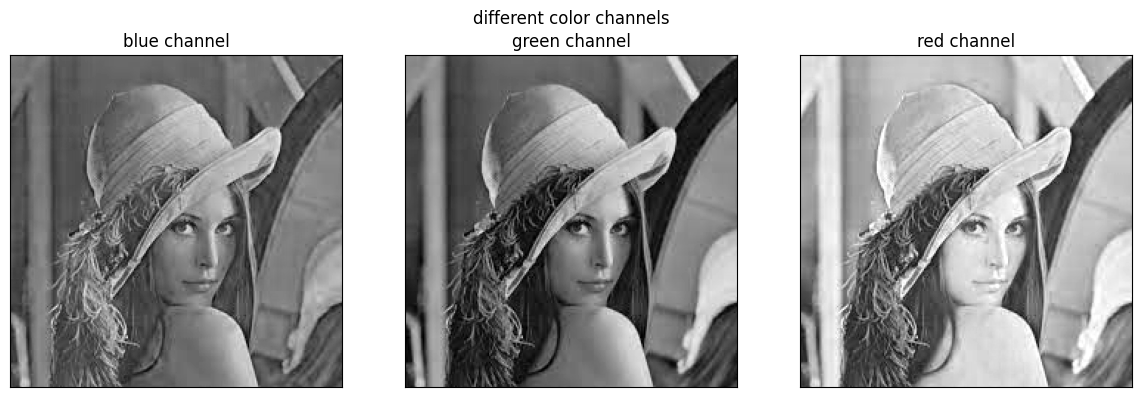

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("different color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

# the brighter the channel, the original pic will show more the color of the channel

## Exercise

In [21]:
# Apply Color Filter
k
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\dog.jfif"
img = cv.imread(path)

#window names
colors = ("blue", "green", "red")

channels = cv.split(img)

imgs = []
for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[:, :, i] = ch
    imgs.append(img_arr)
    
for img, c in zip(imgs, colors):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators (mathematical operations)

####   f'(x) = af(x) + b
####   a > 1 -> enhance image contrast
####   b > 0 -> increase brightness
####   0 < a < 1 -> decrease contrast
####   b < 0 -> decrease brightness

$$f_{trans} (\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

In [22]:
np.uint8(np.array([-2, 0, 255, 300]))  
# result showing 256-2 and 300-256, dun wan this, wan -2->0, 300->255

array([254,   0, 255,  44], dtype=uint8)

In [23]:
def point_op(img, alpha, beta):
    """point operators. Arguments:
    1. Source Image
    2. Multiplier
    3. Constant"""
    
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [25]:
# enhance brightness and contrast
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\bridge.jfif"
img = cv.imread(path)

transform = point_op(img, 2, 30)

cv.imshow("original", img)
show_img("transform", transform)

In [26]:
transform2 = point_op(img, 1, -80)

cv.imshow("original", img)
show_img("transform2", transform2)

## Gamma Correction

$$O = (\frac{I}{255})^{\gamma} \times 255 $$

In [29]:
gamma = 1/2.2

lookUpTable = np.empty((1, 256), dtype=np.uint8)

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255, gamma) * 255, 0, 255)

path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\mountains_prop.jpg"
img = cv.imread(path)
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma correction", res, adjust=True)

## Image blending (add 2 images together)
get a sense of transparency

$$g(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)h(\textbf{x}) + \beta$$

In [30]:
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\lena.jfif"
img = cv.imread(path)

path1 = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\coins.jfif"
img2 = cv.imread(path1)

# resize img2
alpha = 0.4    # try 0.4 and 0.8
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# blending
res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("img1", img)
cv.imshow("img2", img2)
show_img("blending", res)

## exercise 4

In [22]:
from PIL import Image, ImageDraw, ImageFont
import cv2 as cv

# Open the original image
image_path = r'C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\travel_hd.jpg'
image = Image.open(image_path)

# Create a transparent watermark image (PNG format with alpha channel)
watermark = Image.new('RGBA', image.size, (0, 0, 0, 0))
draw = ImageDraw.Draw(watermark)

# Define the watermark text and font
text = "How Cute Is Bee"
font_path = r'C:\Path\to\arial.ttf'  # Replace with the path to your desired font file
font_size = 72
font = ImageFont.truetype(font_path, font_size)

# Draw the watermark text on the transparent image
draw.text((30,100), text, font=font, fill=(255, 255, 255, 128))

# Convert the watermark image to RGB mode
watermark_rgb = watermark.convert('RGB')

# Blend the original image with the watermark image
watermarked_image = Image.blend(image, watermark_rgb, alpha=0.5)  # You can adjust the alpha value for the desired transparency level

# Save the watermarked image as JPEG
output_path = r'C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\watermarked_image.jpg'
watermarked_image.save(output_path)

print(f"Watermarked image saved as {output_path}")
path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\watermarked_image.jpg"
img = cv.imread(path)
show_img("watermark", img)

Watermarked image saved as C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\watermarked_image.jpg
